In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
car=pd.read_csv('quikr_car.csv')

In [8]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [9]:
car.shape

(892, 6)

In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [11]:
### Creating backup copy

In [12]:
backup=car.copy()

## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

### Cleaning Data

In [13]:
# year has many non-year values

In [14]:
car=car[car['year'].str.isnumeric()]

In [15]:
# year is in object. Change to integer

In [16]:
car['year']=car['year'].astype(int)

In [17]:
# Price has Ask for Price

In [18]:
car=car[car['Price']!='Ask For Price']

In [19]:
# Price has commas in its prices and is in object

In [20]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [21]:
# kms_driven has object values with kms at last.

In [22]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [23]:
# It has nan values and two rows have 'Petrol' in them

In [24]:
car=car[car['kms_driven'].str.isnumeric()]

In [25]:
car['kms_driven']=car['kms_driven'].astype(int)

In [26]:
# fuel_type has nan values

In [27]:
car=car[~car['fuel_type'].isna()]

In [28]:
car.shape

(816, 6)

In [29]:
# name and company had spammed data...but with the previous cleaning, those rows got removed.

In [30]:
# Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [31]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [32]:
# Resetting the index of the final cleaned data

In [33]:
car=car.reset_index(drop=True)

In [34]:
# Cleaned Data

In [35]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [36]:
car.to_csv('Cleaned_Car_data.csv')

In [37]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [38]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [39]:
car=car[car['Price']<6000000]

In [40]:
# Checking relationship of Company with Price

In [41]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [42]:
import seaborn as sns

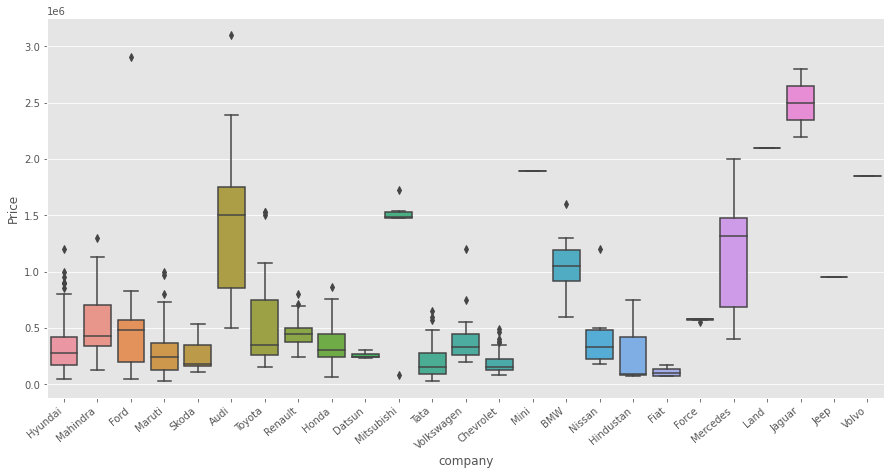

In [43]:
plt.subplots(figsize = (15,7))
ax= sns.boxplot(x = 'company', y = 'Price' , data = car)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40,ha = 'right')
plt.show()

In [44]:
# Checking relationship of Year with Price

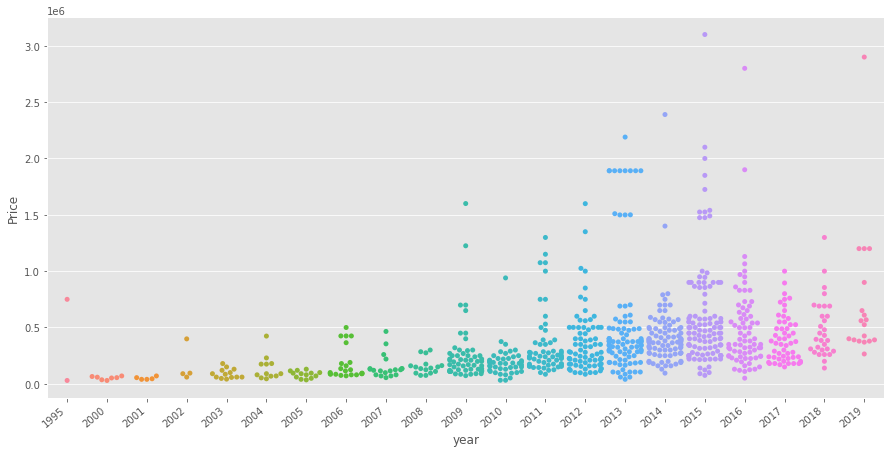

In [45]:
plt.subplots(figsize = (15,7))
ax= sns.swarmplot(x = 'year', y = 'Price' , data = car)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40,ha = 'right')
plt.show()

In [46]:
# Checking relationship of kms_driven with Price

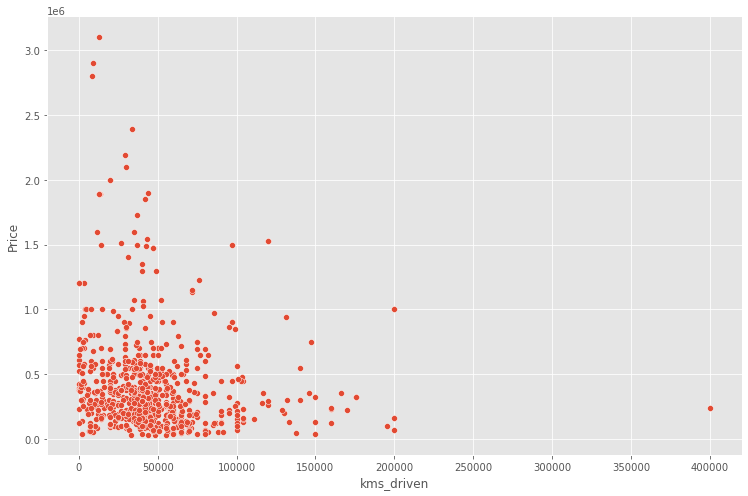

In [47]:
sns.relplot(x = 'kms_driven', y = 'Price', data = car, height = 7, aspect = 1.5)

In [48]:
# Checking relationship of Fuel Type with Price

<AxesSubplot:xlabel='fuel_type', ylabel='Price'>

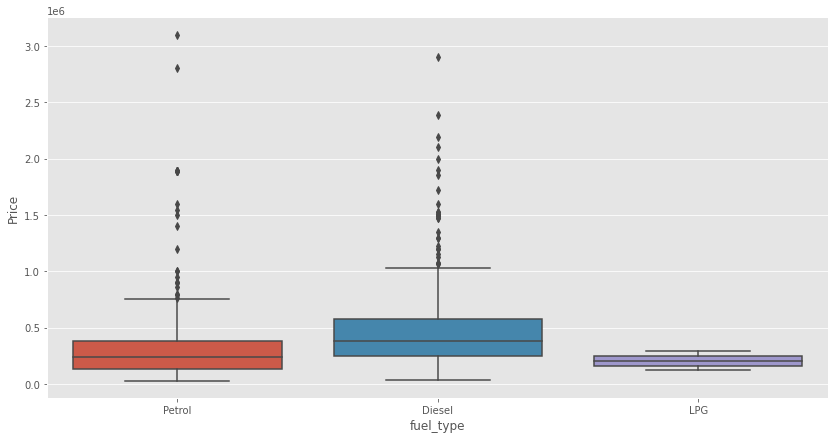

In [49]:
plt.subplots(figsize=(14,7))
sns.boxplot(x = 'fuel_type', y = 'Price', data =car)

In [50]:
# Relationship of Price with FuelType, Year and Company mixed

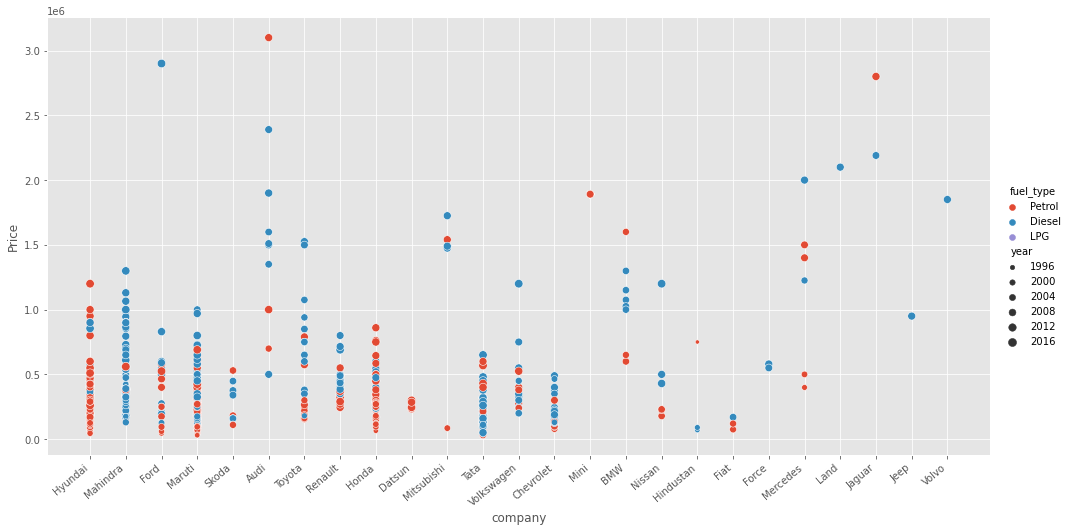

In [51]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [52]:
# Extracting Training Data

In [53]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [54]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [55]:
y.shape

(815,)

In [56]:
# Applying Train Test Split

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [59]:
# Creating an OneHotEncoder object to contain all the possible categories

In [60]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [61]:
# Creating a column transformer to transform categorical columns

In [62]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [63]:
 # Linear Regression Model

In [64]:
lr=LinearRegression()

In [65]:
# Making a pipeline

In [66]:
pipe=make_pipeline(column_trans,lr)

In [67]:
# Fitting the model

In [68]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [69]:
y_pred = pipe.predict(X_test)

In [70]:
#Checking R2 Score

In [71]:
r2_score(y_test,y_pred)

0.5846391247612899

In [72]:
# Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [73]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [74]:
np.argmax(scores)

655

In [75]:
scores[np.argmax(scores)]

0.9200894544056878

In [76]:
#The best model is found at a certain random state

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9200894544056878

In [78]:
import pickle

In [79]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [80]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([416110.43274684])